!pip install seaborn

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv('heart.csv')

In [6]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


# EDA


In [8]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [9]:
df.shape

(918, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [11]:
df.isnull().sum() #no null

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [12]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

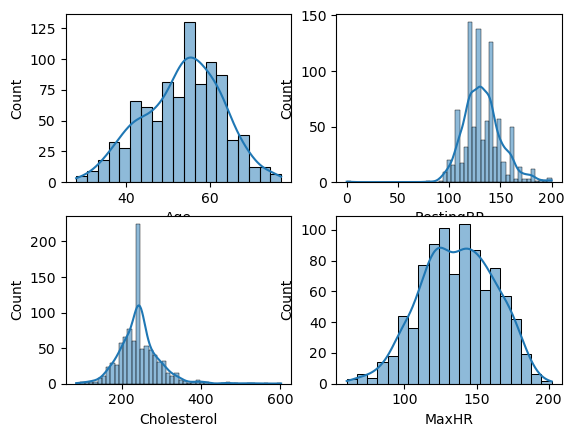

In [22]:
def plot(var,num):
    plt.subplot(2,2,num)
    sns.histplot(df[var],kde=True)
plot('Age',1)
plot('RestingBP',2)
plot('Cholesterol',3)
plot('MaxHR',4)

In [20]:
ch_mean = df.loc[df['Cholesterol'] != 0, 'Cholesterol'].mean()
df['Cholesterol'] = df['Cholesterol'].replace(0,ch_mean).round(2)

In [21]:
df


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264.0,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193.0,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131.0,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236.0,0,LVH,174,N,0.0,Flat,1


In [31]:
resting_bp = df.loc[df['RestingBP']!=0, 'RestingBP'].mean()
df['RestingBP'] = df[['RestingBP']].replace(0,resting_bp).round(2)
df


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110.0,264.0,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144.0,193.0,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130.0,131.0,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130.0,236.0,0,LVH,174,N,0.0,Flat,1


<Axes: xlabel='Sex', ylabel='count'>

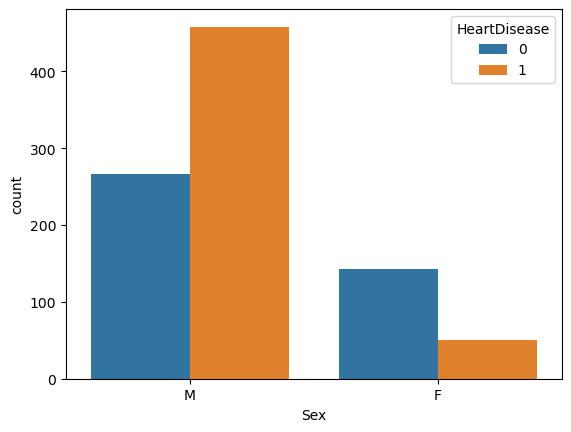

In [35]:
sns.countplot(x=df['Sex'],hue=df['HeartDisease'])

<Axes: xlabel='ChestPainType', ylabel='count'>

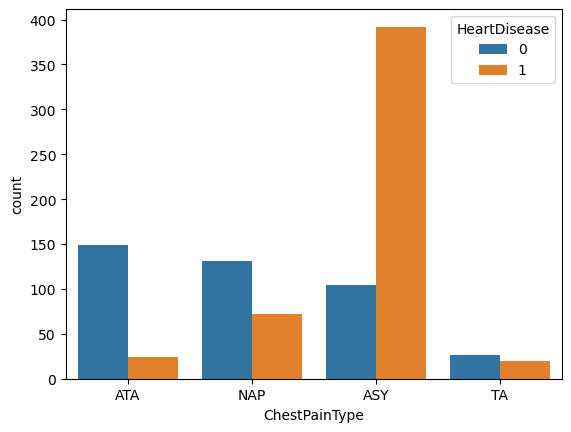

In [33]:
sns.countplot(x=df['ChestPainType'],hue = df['HeartDisease'])

<Axes: xlabel='FastingBS', ylabel='count'>

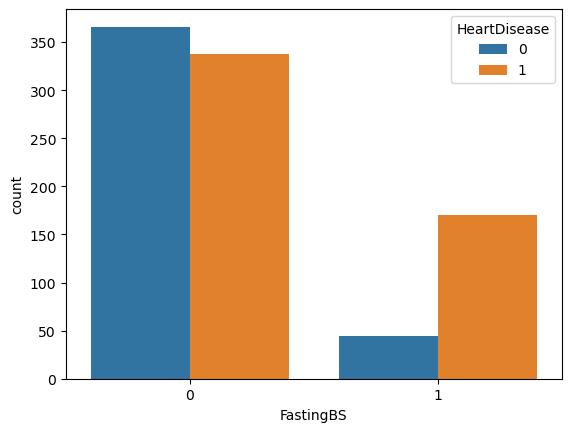

In [36]:
sns.countplot(x=df['FastingBS'],hue = df['HeartDisease'])

<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

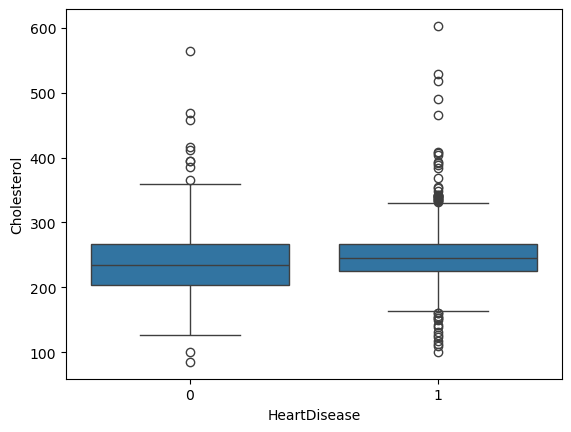

In [38]:
sns.boxplot(x=df['HeartDisease'],y=df['Cholesterol'],data=df)

<Axes: xlabel='HeartDisease', ylabel='Age'>

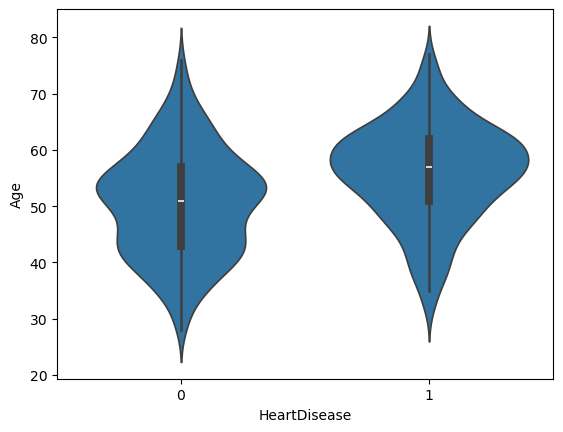

In [39]:
sns.violinplot(x='HeartDisease',y='Age',data=df)

<Axes: >

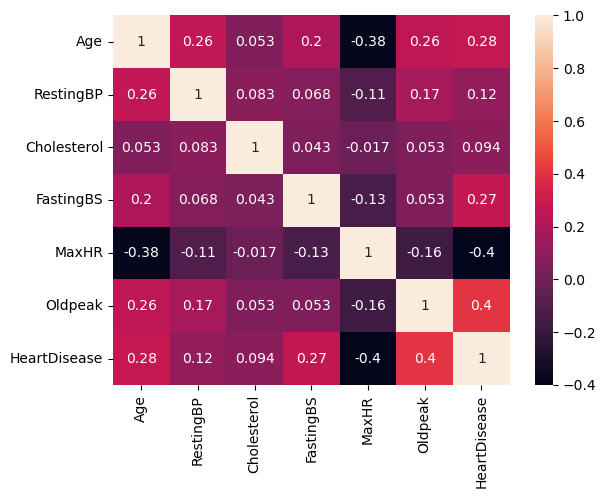

In [41]:
sns.heatmap(df.corr(numeric_only=True),annot=True
           )

# Feature Extraction and Engineering

In [55]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0


In [69]:
df['Sex'].value_counts().sort_values()

Sex
F    193
M    725
Name: count, dtype: int64

In [78]:

df.loc[(df['Age'] > 15) & (df['Age'] <= 19),'age_standarization'] = 'adolescents'
df.loc[(df['Age'] > 19) & (df['Age'] <= 24),'age_standarization'] = 'young_adults'
df.loc[(df['Age'] > 24) & (df['Age'] <= 59),'age_standarization'] = 'adults'
df.loc[df['Age'] > 59,'age_standarization']= 'older_adults'

df = df.drop(columns=['age_label'])

In [80]:
def high_cholesterol(chol):
    age = chol['Age']
    sex = chol['Sex']
    chol = chol['Cholesterol']

    if sex == 'M':
        if age < 45:
            threshold = 200
        else:
            threshold = 240
    else:
        if age < 55:
            threshold = 200 
        else:
            threshold = 240
    return int(chol >= threshold)

df['high_cholesterol'] = df.apply(high_cholesterol, axis=1)

df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,age_standarization,high_cholesterol
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0,adults,1
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1,adults,0
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0,adults,1
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1,adults,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0,adults,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110.0,264.0,0,Normal,132,N,1.2,Flat,1,adults,1
914,68,M,ASY,144.0,193.0,1,Normal,141,N,3.4,Flat,1,older_adults,0
915,57,M,ASY,130.0,131.0,0,Normal,115,Y,1.2,Flat,1,adults,0
916,57,F,ATA,130.0,236.0,0,LVH,174,N,0.0,Flat,1,adults,0


In [81]:
df['high_cholesterol'].value_counts()

high_cholesterol
1    605
0    313
Name: count, dtype: int64

In [86]:
def high_bp(row):
    age = row['Age']
    sex = row['Sex']
    bp = row['RestingBP']

    if sex == 'M':
        if age < 50:
            threshold = 130
        else:
            threshold = 140
    else:
        if age < 60:
            threshold = 130
        else:
            threshold = 140
    return int(bp >= threshold)

df['high_bp'] = df.apply(high_bp, axis=1)

df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,age_standarization,high_cholesterol,high_bp
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0,adults,1,1
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1,adults,0,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0,adults,1,1
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1,adults,1,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0,adults,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110.0,264.0,0,Normal,132,N,1.2,Flat,1,adults,1,0
914,68,M,ASY,144.0,193.0,1,Normal,141,N,3.4,Flat,1,older_adults,0,1
915,57,M,ASY,130.0,131.0,0,Normal,115,Y,1.2,Flat,1,adults,0,0
916,57,F,ATA,130.0,236.0,0,LVH,174,N,0.0,Flat,1,adults,0,1


<Axes: xlabel='age_standarization', ylabel='count'>

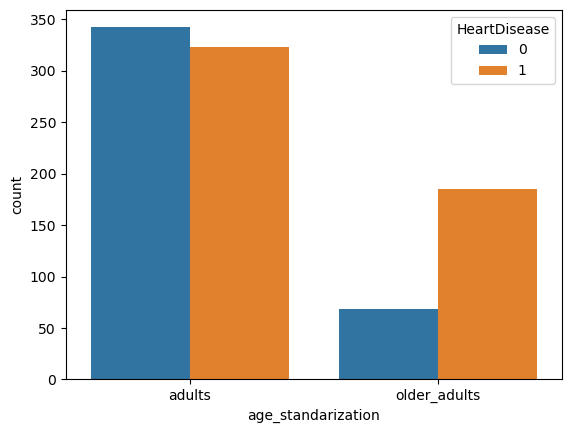

In [62]:
sns.countplot(x=df['age_standarization'],hue=df['HeartDisease'])

<Axes: xlabel='high_cholesterol', ylabel='count'>

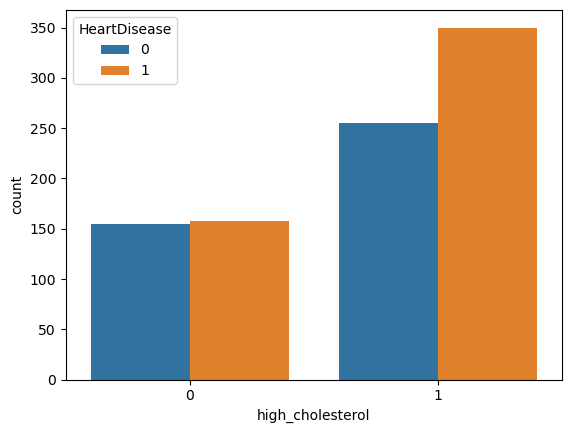

In [82]:
sns.countplot(x=df['high_cholesterol'],hue=df['HeartDisease'])

<Axes: xlabel='high_bp', ylabel='count'>

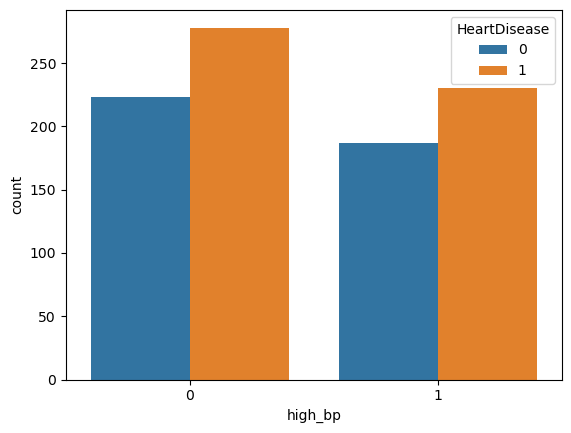

In [87]:
sns.countplot(x=df['high_bp'],hue=df['HeartDisease'])

<Axes: >

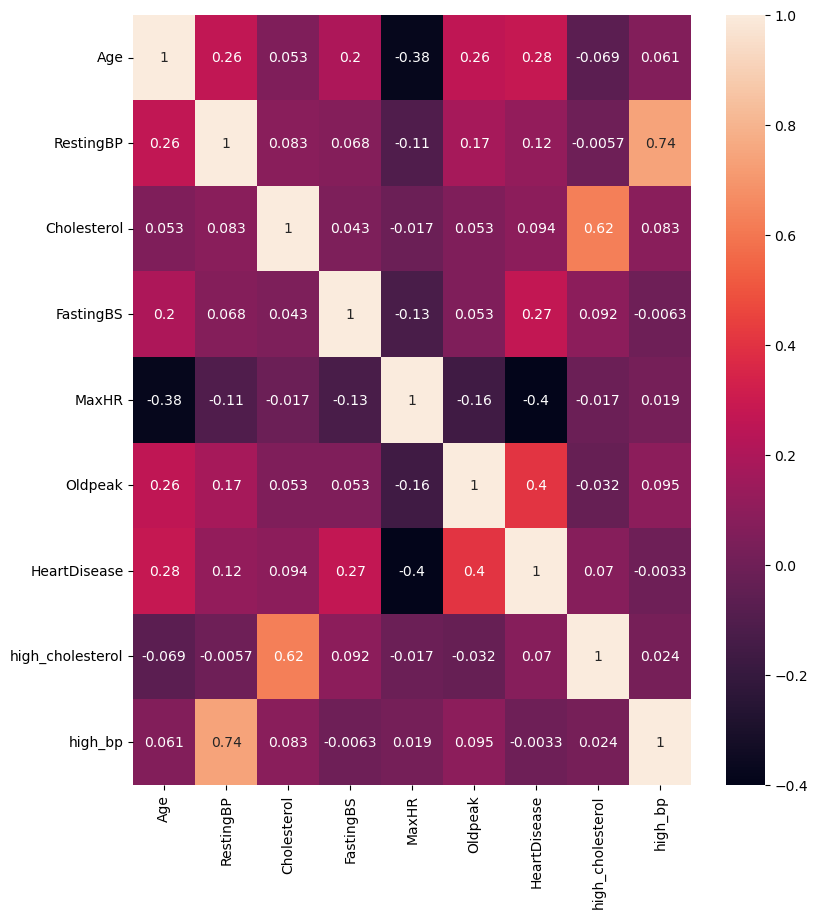

In [93]:
plt.figure(figsize=(9,10))
sns.heatmap(df.corr(numeric_only=True),annot=True
           )

# Data Preprocessing 


In [97]:
df_encode = pd.get_dummies(df,drop_first=True)
df_encode

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,high_cholesterol,high_bp,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,age_standarization_older_adults
0,40,140.0,289.0,0,172,0.0,0,1,1,True,True,False,False,True,False,False,False,True,False
1,49,160.0,180.0,0,156,1.0,1,0,1,False,False,True,False,True,False,False,True,False,False
2,37,130.0,283.0,0,98,0.0,0,1,1,True,True,False,False,False,True,False,False,True,False
3,48,138.0,214.0,0,108,1.5,1,1,1,False,False,False,False,True,False,True,True,False,False
4,54,150.0,195.0,0,122,0.0,0,0,1,True,False,True,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110.0,264.0,0,132,1.2,1,1,0,True,False,False,True,True,False,False,True,False,False
914,68,144.0,193.0,1,141,3.4,1,0,1,True,False,False,False,True,False,False,True,False,True
915,57,130.0,131.0,0,115,1.2,1,0,0,True,False,False,False,True,False,True,True,False,False
916,57,130.0,236.0,0,174,0.0,1,0,1,False,True,False,False,False,False,False,True,False,False


In [100]:
df_encode = df_encode.astype(int)

In [101]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols = ['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak']
df_encode[cols] = scaler.fit_transform(df_encode[cols])

In [102]:
df_encode

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,high_cholesterol,high_bp,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,age_standarization_older_adults
0,-1.433140,0.414885,0.834754,-0.551341,1.382928,-0.727592,0,1,1,1,1,0,0,1,0,0,0,1,0
1,-0.478484,1.527224,-1.210675,-0.551341,0.754157,0.282891,1,0,1,0,0,1,0,1,0,0,1,0,0
2,-1.751359,-0.141284,0.722161,-0.551341,-1.525138,-0.727592,0,1,1,1,1,0,0,0,1,0,0,1,0
3,-0.584556,0.303651,-0.572651,-0.551341,-1.132156,0.282891,1,1,1,0,0,0,0,1,0,1,1,0,0
4,0.051881,0.971054,-0.929194,-0.551341,-0.581981,-0.727592,0,0,1,1,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,-1.253622,0.365619,-0.551341,-0.188999,0.282891,1,1,0,1,0,0,1,1,0,0,1,0,0
914,1.536902,0.637353,-0.966725,1.813758,0.164684,2.303858,1,0,1,1,0,0,0,1,0,0,1,0,1
915,0.370100,-0.141284,-2.130180,-0.551341,-0.857069,0.282891,1,0,0,1,0,0,0,1,0,1,1,0,0
916,0.370100,-0.141284,-0.159813,-0.551341,1.461525,-0.727592,1,0,1,0,1,0,0,0,0,0,1,0,0


In [103]:
df_encode.corr(numeric_only=True)['HeartDisease'].sort_values()


ST_Slope_Up                       -0.622164
ChestPainType_ATA                 -0.401924
MaxHR                             -0.400421
ChestPainType_NAP                 -0.212964
RestingECG_Normal                 -0.091580
ChestPainType_TA                  -0.054790
high_bp                           -0.003337
high_cholesterol                   0.070293
Cholesterol                        0.092586
RestingECG_ST                      0.102527
RestingBP                          0.117909
age_standarization_older_adults    0.220657
FastingBS                          0.267291
Age                                0.282039
Sex_M                              0.305445
Oldpeak                            0.392385
ExerciseAngina_Y                   0.494282
ST_Slope_Flat                      0.554134
HeartDisease                       1.000000
Name: HeartDisease, dtype: float64

In [109]:
cols =['high_cholesterol','Cholesterol',
'RestingECG_ST',                      
'RestingBP' ,                        
'age_standarization_older_adults' ,   
'FastingBS' ,                         
'Age',                               
'Sex_M',                              
'Oldpeak',                            
'ExerciseAngina_Y',                  
'ST_Slope_Flat',
'ST_Slope_Up',                       
'ChestPainType_ATA',                
'MaxHR',                             
'ChestPainType_NAP',                 
'RestingECG_Normal',                 
'ChestPainType_TA',                  
'high_bp']

In [110]:
from scipy.stats import chi2_contingency

alpha = 0.05
rows = []

for feature in cols:
    contingency_table = pd.crosstab(
        df_encode[feature],
        df_encode['HeartDisease']
    )

    chi2, p_value, dof, expected = chi2_contingency(contingency_table)

    rows.append({
        'Feature': feature,
        'Chi_Square': chi2,
        'p_value': p_value,
        'Recommendation': 'KEEP' if p_value < alpha else 'DROP'
    })

chi_square_df = pd.DataFrame(rows)
chi_square_df.sort_values('p_value')

,Feature,Chi_Square,p_value,Recommendation
11,ST_Slope_Up,352.823905,1.028493e-78,KEEP
10,ST_Slope_Flat,279.659914,8.906496e-63,KEEP
9,ExerciseAngina_Y,222.259383,2.907808e-50,KEEP
8,Oldpeak,182.849456,2.594848e-35,KEEP
12,ChestPainType_ATA,146.236323,1.152597e-33,KEEP
7,Sex_M,84.145101,4.597617e-20,KEEP
5,FastingBS,64.320679,1.057302e-15,KEEP
4,age_standarization_older_adults,43.709242,3.809684e-11,KEEP
13,MaxHR,241.320595,1.721922e-10,KEEP
14,ChestPainType_NAP,40.608711,1.859758e-10,KEEP


In [114]:
keep_cols = [
    'ST_Slope_Up',
    'ST_Slope_Flat',
    'ExerciseAngina_Y',
    'Oldpeak',
    'ChestPainType_ATA',
    'ChestPainType_NAP',
    'Sex_M',
    'FastingBS',
    'MaxHR',
    'Age',
    'high_cholesterol',
    'high_bp',
    'HeartDisease'
]


In [115]:
df_final = df_encode[keep_cols]

In [116]:
df_final

,ST_Slope_Up,ST_Slope_Flat,ExerciseAngina_Y,Oldpeak,ChestPainType_ATA,ChestPainType_NAP,Sex_M,FastingBS,MaxHR,Age,high_cholesterol,high_bp,HeartDisease
0,1,0,0,-0.727592,1,0,1,-0.551341,1.382928,-1.433140,1,1,0
1,0,1,0,0.282891,0,1,0,-0.551341,0.754157,-0.478484,0,1,1
2,1,0,0,-0.727592,1,0,1,-0.551341,-1.525138,-1.751359,1,1,0
3,0,1,1,0.282891,0,0,0,-0.551341,-1.132156,-0.584556,1,1,1
4,1,0,0,-0.727592,0,1,1,-0.551341,-0.581981,0.051881,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0,1,0,0.282891,0,0,1,-0.551341,-0.188999,-0.902775,1,0,1
914,0,1,0,2.303858,0,0,1,1.813758,0.164684,1.536902,0,1,1
915,0,1,1,0.282891,0,0,1,-0.551341,-0.857069,0.370100,0,0,1
916,0,1,0,-0.727592,1,0,0,-0.551341,1.461525,0.370100,0,1,1
